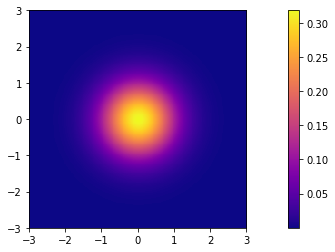

initialize mean : [0. 0.]
initialize cov matrix [[0.5 0. ]
 [0.  0.5]]


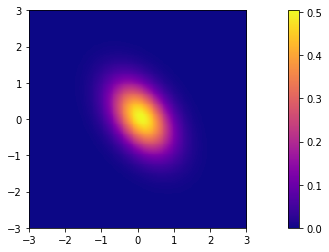

epi1: mean : [ 0.07672116 -0.05393466]
epi1: cov matrix [[0.29859903 0.14158406]
 [0.14158406 0.40046699]]


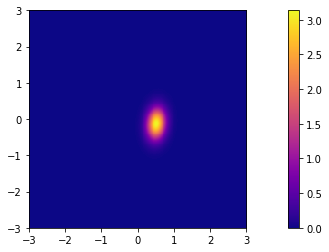

epi10: mean : [0.49088835 0.11546104]
epi10: cov matrix [[ 0.03081771 -0.00481155]
 [-0.00481155  0.08408456]]


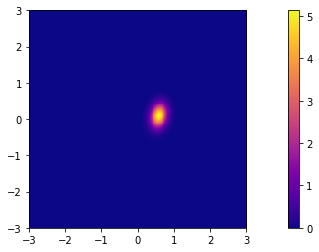

epi20: mean : [ 0.55994791 -0.105825  ]
epi20: cov matrix [[ 0.02106202 -0.00473449]
 [-0.00473449  0.0465188 ]]


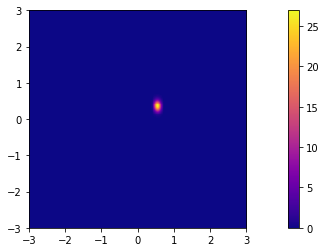

epi100: mean : [ 0.52571689 -0.37268735]
epi100: cov matrix [[0.00356019 0.00024263]
 [0.00024263 0.00982046]]


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# we defined a class for sequential bayesian learner
class bayesian_linear_regression(object):

    # initialized with covariance matrix(sigma), mean vector(mu) and prior(beta)
    def __init__(self,sigma,mu,beta):
        self.sigma = sigma
        self.mu = mu
        self.beta = beta
    # you need to implement the update function
    # when received additional design matrix phi and continuous label t
    def update(self,phi,t):
        temp=self.sigma
        self.sigma = np.linalg.inv(np.linalg.inv(self.sigma)+self.beta*phi.T@phi)
        self.mu = self.sigma@(self.beta*phi.T@t +np.linalg.inv(temp)@self.mu)
        return self


def data_generator(size,scale):
    x = np.random.uniform(low=-3, high=3, size=size)
    rand = np.random.normal(0, scale=scale, size=size)
    y = 0.5 * x - 0.3 + rand
    phi = np.array([[x[i], 1] for i in range(x.shape[0])])
    t = y
    return phi, t

def plot_heat(mu,sigma):
    
    plot_delta = 0.025
    plot_x = np.arange(-3.0, 3.0, plot_delta)
    plot_y = np.arange(-3.0, 3.0, plot_delta)
    X, Y = np.meshgrid(plot_x, plot_y)
    x_len = plot_x.shape[0]
    y_len = plot_y.shape[0]
    Z = np.zeros((x_len, y_len))
    temp = 1/np.sqrt((2*math.pi)**2*np.linalg.det(sigma))
    for i in range(x_len):
        for j in range(y_len):
            Z[j][i] =temp*np.exp(-1/2*(([X[j][i],Y[j][i]]-mu)@np.linalg.inv(sigma)@([X[j][i],Y[j][i]]-mu).T))  
    plt.clf()
    img = Z
    plt.imshow(img, interpolation='none', extent=[-3.0, 3.0, -3.0, 3.0],cmap="plasma")
    plt.colorbar()
    plt.axis("square")
    plt.show()
    
    
def main():
    # initialization
    alpha = 2
    sigma_0 = np.diag(1.0/alpha*np.ones([2]))
    mu_0 = np.zeros([2])
    beta = 1.0
    plot_heat(mu_0,sigma_0)
    print('initialize mean :',mu_0)
    print('initialize cov matrix', sigma_0)
    plt.savefig('initializatio.png')
    blr_learner = bayesian_linear_regression(sigma_0, mu_0, beta=beta)
    num_episodes = 100
    for epi in range(num_episodes):
        phi, t = data_generator(1,1.0/beta)
        a = blr_learner.update(phi,t)
        if epi == 0:
            plot_heat(a.mu,a.sigma)
            print('epi1: mean :',a.mu)
            print('epi1: cov matrix',a.sigma)
            plt.savefig('epi1.png')
            
        if epi == 9:
            plot_heat(a.mu,a.sigma)
            print('epi10: mean :',a.mu)
            print('epi10: cov matrix', a.sigma)
            plt.savefig('epi10.png')
            
        if epi == 19:
            plot_heat(a.mu,a.sigma)
            print('epi20: mean :',a.mu)
            print('epi20: cov matrix', a.sigma) 
            plt.savefig('epi20.png')
        if epi == 99:
            plot_heat(a.mu,a.sigma)
            print('epi100: mean :',a.mu)
            print('epi100: cov matrix', a.sigma) 
            plt.savefig('epi100.png')
main()



